## Crime Data Cleaning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('crime.csv')

In [22]:
df.head()

,Гэмт хэргийн төрөл,Хэргийн дугаар,Хэргийн огноо,Хэргийн байршил,Шалгасан ЦХ
0,Танхайрах,21137048.0,12/31/2010,"Сонгинохайрхан дүүрэг, 15-р хороо,",Сонгинохайрхан дүүргийн ЦХ /хуучин/
1,Бусдын бие махбодид гэмтэл учруулах,21129138.0,12/31/2010,"Баянзүрх дүүрэг, 6-р хороо,",Баянзүрх дүүргийн ЦХ /хуучин/
2,Дээрэмдэх,21140067.0,12/31/2010,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүргийн ЦХ /хуучин/
3,Дээрэмдэх,21132012.0,12/31/2010,"Баянгол дүүрэг, 15-р хороо,",Баянгол дүүргийн цагдаагийн 2-р хэлтэс
4,Дээрэмдэх,21133918.0,12/31/2010,"Баянгол дүүрэг, 4-р хороо, 2,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс


## Check Dtypes

In [23]:
df.dtypes

Гэмт хэргийн төрөл     object
Хэргийн дугаар        float64
Хэргийн огноо          object
Хэргийн байршил        object
Шалгасан ЦХ            object
dtype: object

In [24]:
df = df.rename(columns={'Гэмт хэргийн төрөл':'type',
                        'Хэргийн дугаар':'number',
                        'Хэргийн огноо':'date',
                       'Хэргийн байршил':'location',
                       'Шалгасан ЦХ':'station'})

In [25]:
df['date']

0        12/31/2010
1        12/31/2010
2        12/31/2010
3        12/31/2010
4        12/31/2010
            ...    
71740           NaN
71741           NaN
71742           NaN
71743           NaN
71744           NaN
Name: date, Length: 71745, dtype: object

In [26]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df.dtypes

type                object
number             float64
date        datetime64[ns]
location            object
station             object
dtype: object

In [28]:
df['number'].astype('int', errors='ignore')

0        21137048.0
1        21129138.0
2        21140067.0
3        21132012.0
4        21133918.0
            ...    
71740           NaN
71741           NaN
71742           NaN
71743           NaN
71744           NaN
Name: number, Length: 71745, dtype: float64

In [10]:
df.dtypes

type                object
number             float64
date        datetime64[ns]
location            object
station             object
dtype: object

In [29]:
df.shape

(71745, 5)

## Handle NaN's

In [11]:
df.isnull().any()

type        True
number      True
date        True
location    True
station     True
dtype: bool

In [12]:
df.isnull().sum()

type        951
number      951
date        951
location    951
station     951
dtype: int64

In [13]:
df.isnull().sum() / df.shape[0]

type        0.013255
number      0.013255
date        0.013255
location    0.013255
station     0.013255
dtype: float64

First we will create a mask for the entire dataframe. This will show us boolean values whether each cell is NaN or not.

In [30]:
mask = df.isnull()

This will look to see if there is at least 1 True value in each row (axis=1), then we will save that to a row mask.

In [31]:
row_mask = mask.any(axis=1)
row_mask

0        False
1        False
2        False
3        False
4        False
         ...  
71740     True
71741     True
71742     True
71743     True
71744     True
Length: 71745, dtype: bool

In [32]:
df[~row_mask]

,type,number,date,location,station
0,Танхайрах,2.113705e+07,2010-12-31,"Сонгинохайрхан дүүрэг, 15-р хороо,",Сонгинохайрхан дүүргийн ЦХ /хуучин/
1,Бусдын бие махбодид гэмтэл учруулах,2.112914e+07,2010-12-31,"Баянзүрх дүүрэг, 6-р хороо,",Баянзүрх дүүргийн ЦХ /хуучин/
2,Дээрэмдэх,2.114007e+07,2010-12-31,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүргийн ЦХ /хуучин/
3,Дээрэмдэх,2.113201e+07,2010-12-31,"Баянгол дүүрэг, 15-р хороо,",Баянгол дүүргийн цагдаагийн 2-р хэлтэс
4,Дээрэмдэх,2.113392e+07,2010-12-31,"Баянгол дүүрэг, 4-р хороо, 2,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс
...,...,...,...,...,...
70789,Бусдын бие махбодид гэмтэл учруулах,2.015260e+11,2017-07-01,"Сонгинохайрхан дүүрэг, 16-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс
70790,Хулгайлах - Иргэдийн өмч,2.017030e+11,2017-08-15,"Архангай аймаг Чулуут сум Өлзийт баг, 1-р хоро...",Архангай аймаг дахь ЦГ
70791,Хулгайлах - Иргэдийн өмч,2.017140e+11,2017-08-19,"Орхон аймаг Баян өндөр сум Хүрэнбулаг баг, 4-р...",Орхон аймаг дахь ЦГ
70792,Хулгайлах - Иргэдийн өмч,2.016260e+11,2017-10-03,"Хан-Уул, 15-р хороо,",Хан-Уул дүүрэг дэх цагдаагийн 1-р хэлтэс


In [16]:
df = df.dropna()

In [19]:
df.shape

(70794, 5)

In [19]:
df.sample(5)

,type,number,date,location,station
59028,Танхайрах,2.016250e+11,2016-07-16,"Баянзүрх дүүрэг, 7-р хороо,",Баянзүрх дүүрэг дэх цагдаагийн 2-р хэлтэс
40056,Хулгайлах - Иргэдийн өмч,2.015260e+11,2015-09-16,"Сонгинохайрхан дүүрэг, 6-р хороо, хм,",Сонгинохайрхан дүүрэг дэх цагдаагийн 2-р хэлтэс
41335,Бусдын бие махбодид гэмтэл учруулах,2.015260e+11,2015-10-07,"Баянгол дүүрэг, 5-р хороо,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс
38236,Бусдын бие махбодид гэмтэл учруулах,2.015190e+11,2015-08-15,"Төв аймаг Эрдэнэ сум Тэрэлж баг, 1-р хороо,",Төв аймаг дахь ЦГ
20048,Бусдын бие махбодид гэмтэл учруулах,2.014250e+12,2014-06-26,"Чингэлтэй дүүрэг, 16-р хороо,",Чингэлтэй дүүргийн цагдаагийн 2-р хэлтэс


In [20]:
df.isnull().sum()

type        0
number      0
date        0
location    0
station     0
dtype: int64

In [21]:
df.dtypes

type                object
number             float64
date        datetime64[ns]
location            object
station             object
dtype: object

## Check Duplicates

In [22]:
df.head()

,type,number,date,location,station
0,Танхайрах,21137048.0,2010-12-31,"Сонгинохайрхан дүүрэг, 15-р хороо,",Сонгинохайрхан дүүргийн ЦХ /хуучин/
1,Бусдын бие махбодид гэмтэл учруулах,21129138.0,2010-12-31,"Баянзүрх дүүрэг, 6-р хороо,",Баянзүрх дүүргийн ЦХ /хуучин/
2,Дээрэмдэх,21140067.0,2010-12-31,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүргийн ЦХ /хуучин/
3,Дээрэмдэх,21132012.0,2010-12-31,"Баянгол дүүрэг, 15-р хороо,",Баянгол дүүргийн цагдаагийн 2-р хэлтэс
4,Дээрэмдэх,21133918.0,2010-12-31,"Баянгол дүүрэг, 4-р хороо, 2,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс


In [23]:
df.duplicated(subset=['number', 'type']).sum()

68069

In [24]:
df.duplicated(subset='number').sum()

68740

In [25]:
df.shape

(70794, 5)

In [26]:
df[df.duplicated(subset='number')]

,type,number,date,location,station
389,Хулгайлах - Иргэдийн өмч,2.012010e+11,2011-05-10,"Сүхбаатар дүүрэг, 7-р хороо, 11,",Сүхбаатар дүүргийн цагдаагийн 1-р хэлтэс
449,Бусдын бие махбодид гэмтэл учруулах,2.012010e+11,2011-05-16,"Баянгол дүүрэг, 7-р хороо,",Мөрдөн байцаах газар
798,Танхайрах,2.012010e+11,2011-07-06,"Баянгол дүүрэг, 14-р хороо, 13,",Баянгол дүүргийн цагдаагийн 1-р хэлтэс
865,Хулгайлах - Иргэдийн өмч,2.012010e+11,2011-07-17,"Сонгинохайрхан дүүрэг, 23-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс
894,Хулгайлах - Иргэдийн өмч,2.012010e+11,2011-07-20,"Баянгол дүүрэг, 6-р хороо,",Сүхбаатар дүүргийн цагдаагийн 1-р хэлтэс
...,...,...,...,...,...
70789,Бусдын бие махбодид гэмтэл учруулах,2.015260e+11,2017-07-01,"Сонгинохайрхан дүүрэг, 16-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс
70790,Хулгайлах - Иргэдийн өмч,2.017030e+11,2017-08-15,"Архангай аймаг Чулуут сум Өлзийт баг, 1-р хоро...",Архангай аймаг дахь ЦГ
70791,Хулгайлах - Иргэдийн өмч,2.017140e+11,2017-08-19,"Орхон аймаг Баян өндөр сум Хүрэнбулаг баг, 4-р...",Орхон аймаг дахь ЦГ
70792,Хулгайлах - Иргэдийн өмч,2.016260e+11,2017-10-03,"Хан-Уул, 15-р хороо,",Хан-Уул дүүрэг дэх цагдаагийн 1-р хэлтэс


In [27]:
df.iloc[389].values

array(['Хулгайлах - Иргэдийн өмч', 201201000000.0,
       Timestamp('2011-05-10 00:00:00'),
       'Сүхбаатар дүүрэг, 7-р хороо, 11,',
       'Сүхбаатар дүүргийн цагдаагийн 1-р хэлтэс'], dtype=object)

In [28]:
df.iloc[389]['number']

201201000000.0

In [29]:
df[df['number'] == 201201000000.0]

,type,number,date,location,station
263,Хүнийг санаатай алах,2.012010e+11,2011-01-27,"Сүхбаатар дүүрэг, 15-р хороо,",Сүхбаатар дүүргийн цагдаагийн 2-р хэлтэс
389,Хулгайлах - Иргэдийн өмч,2.012010e+11,2011-05-10,"Сүхбаатар дүүрэг, 7-р хороо, 11,",Сүхбаатар дүүргийн цагдаагийн 1-р хэлтэс
449,Бусдын бие махбодид гэмтэл учруулах,2.012010e+11,2011-05-16,"Баянгол дүүрэг, 7-р хороо,",Мөрдөн байцаах газар
798,Танхайрах,2.012010e+11,2011-07-06,"Баянгол дүүрэг, 14-р хороо, 13,",Баянгол дүүргийн цагдаагийн 1-р хэлтэс
865,Хулгайлах - Иргэдийн өмч,2.012010e+11,2011-07-17,"Сонгинохайрхан дүүрэг, 23-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс
...,...,...,...,...,...
5740,Хулгайлах - Иргэдийн өмч,2.012010e+11,2012-12-27,"Баянгол дүүрэг, 17-р хороо,",Баянгол дүүргийн цагдаагийн 2-р хэлтэс
5741,Бусдын бие махбодид гэмтэл учруулах,2.012010e+11,2012-12-27,"Сонгинохайрхан дүүрэг, 4-р хороо, ин,",Сонгинохайрхан дүүргийн цагдаагийн 1-р хэлтэс
5749,Бусдын бие махбодид гэмтэл учруулах,2.012010e+11,2012-12-27,"Чингэлтэй дүүрэг, 3-р хороо,",Чингэлтэй дүүргийн цагдаагийн 1-р хэлтэс
5777,Булаах,2.012010e+11,2012-12-28,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүргийн цагдаагийн 1-р хэлтэс


We have determined that the report number seems to be very unreliable. There are many duplicates (almost 90% of the data) and the reports seem completely unrelated. So we will drop this feature.

In [30]:
df = df.drop(columns=['number'])

Now we can check if there are duplicates across all rows.

In [31]:
df[df.duplicated()].shape[0] / df.shape[0]

0.024211091335423904

In [32]:
df[df['type'] == 'Хүнийг санаатай алах'].duplicated()

54       False
72       False
180      False
263      False
415      False
         ...  
70706    False
70714    False
70758    False
70766    False
70775    False
Length: 675, dtype: bool

In [33]:
df['type'].unique()

array(['Танхайрах', 'Бусдын бие махбодид гэмтэл учруулах', 'Дээрэмдэх',
       'Хулгайлах - Мал', 'Хулгайлах - Иргэдийн өмч',
       'Хулгайлах - Халаас', 'Булаах', 'Хулгайлах - Тээврийн хэрэгсэл',
       'Хүнийг санаатай алах', 'Хүчиндэх', 'ТХХАББАЖЗ'], dtype=object)

<AxesSubplot:xlabel='type'>

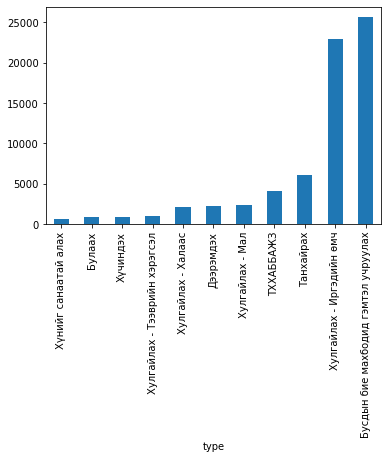

In [34]:
df[~df.duplicated()].groupby(by='type').count()['date'].sort_values().plot.bar()

<AxesSubplot:xlabel='type'>

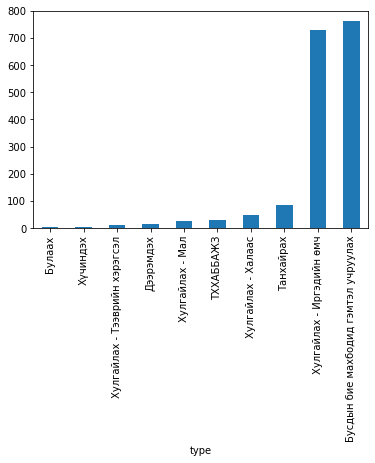

In [35]:
df[df.duplicated()].groupby(by='type').count()['date'].sort_values().plot.bar()

In [36]:
#df = df.drop_duplicates()

In [37]:
df = df.reset_index(drop=True)

In [38]:
df

,type,date,location,station
0,Танхайрах,2010-12-31,"Сонгинохайрхан дүүрэг, 15-р хороо,",Сонгинохайрхан дүүргийн ЦХ /хуучин/
1,Бусдын бие махбодид гэмтэл учруулах,2010-12-31,"Баянзүрх дүүрэг, 6-р хороо,",Баянзүрх дүүргийн ЦХ /хуучин/
2,Дээрэмдэх,2010-12-31,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүргийн ЦХ /хуучин/
3,Дээрэмдэх,2010-12-31,"Баянгол дүүрэг, 15-р хороо,",Баянгол дүүргийн цагдаагийн 2-р хэлтэс
4,Дээрэмдэх,2010-12-31,"Баянгол дүүрэг, 4-р хороо, 2,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс
...,...,...,...,...
70789,Бусдын бие махбодид гэмтэл учруулах,2017-07-01,"Сонгинохайрхан дүүрэг, 16-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс
70790,Хулгайлах - Иргэдийн өмч,2017-08-15,"Архангай аймаг Чулуут сум Өлзийт баг, 1-р хоро...",Архангай аймаг дахь ЦГ
70791,Хулгайлах - Иргэдийн өмч,2017-08-19,"Орхон аймаг Баян өндөр сум Хүрэнбулаг баг, 4-р...",Орхон аймаг дахь ЦГ
70792,Хулгайлах - Иргэдийн өмч,2017-10-03,"Хан-Уул, 15-р хороо,",Хан-Уул дүүрэг дэх цагдаагийн 1-р хэлтэс


## Quick EDA on Type and Date

In [39]:
df['type'].unique()

array(['Танхайрах', 'Бусдын бие махбодид гэмтэл учруулах', 'Дээрэмдэх',
       'Хулгайлах - Мал', 'Хулгайлах - Иргэдийн өмч',
       'Хулгайлах - Халаас', 'Булаах', 'Хулгайлах - Тээврийн хэрэгсэл',
       'Хүнийг санаатай алах', 'Хүчиндэх', 'ТХХАББАЖЗ'], dtype=object)

In [40]:
df.groupby(by='type').count()['date']

type
Булаах                                   869
Бусдын бие махбодид гэмтэл учруулах    26409
Дээрэмдэх                               2242
ТХХАББАЖЗ                               4169
Танхайрах                               6138
Хулгайлах - Иргэдийн өмч               23692
Хулгайлах - Мал                         2374
Хулгайлах - Тээврийн хэрэгсэл           1079
Хулгайлах - Халаас                      2207
Хүнийг санаатай алах                     675
Хүчиндэх                                 940
Name: date, dtype: int64

In [41]:
time_df = df.groupby(by='date').count()

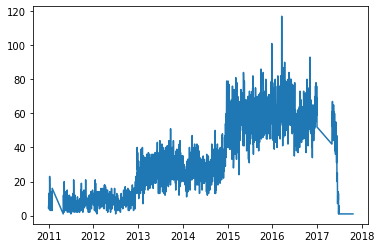

In [42]:
plt.plot(time_df.index, time_df['type'])

In [43]:
df['year'] = df['date'].dt.year

<AxesSubplot:xlabel='year'>

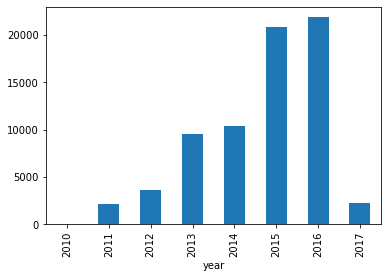

In [44]:
df.groupby(by='year').count()['type'].plot.bar()

It is clear that 2011-2014 does not appear to have complete crime reporting data. We don't necessarily have 100% confidence that 2015 and 2016 are actually either.

In [45]:
df = df[(df['year'] == 2015) | (df['year'] == 2016)]

In [46]:
df

,type,date,location,station,year
25823,Хулгайлах - Иргэдийн өмч,2015-01-01,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс,2015
25824,Хулгайлах - Иргэдийн өмч,2015-01-01,"Сонгинохайрхан дүүрэг, 12-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс,2015
25825,Хулгайлах - Мал,2015-01-01,"Булган аймаг Дашинчилэн сум Доргонт баг, 2-р х...",Булган аймаг дахь ЦГ,2015
25826,Бусдын бие махбодид гэмтэл учруулах,2015-01-01,Баянхонгор аймаг Баянхонгор сум 1 дүгээр баг Н...,Баянхонгор аймаг дахь ЦГ,2015
25827,Дээрэмдэх,2015-01-01,"Сонгинохайрхан дүүрэг, 29-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс,2015
...,...,...,...,...,...
68510,Хулгайлах - Халаас,2016-12-30,"Баянзүрх дүүрэг, 1-р хороо,",Баянзүрх дүүрэг дэх цагдаагийн 2-р хэлтэс,2016
68511,Хулгайлах - Иргэдийн өмч,2016-12-30,"Баянгол дүүрэг, 20-р хороо,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс,2016
68512,Хулгайлах - Иргэдийн өмч,2016-12-30,"Сүхбаатар дүүрэг, 13-р хороо, ногоон талбай,",Сүхбаатар дүүрэг дэх цагдаагийн 2-р хэлтэс,2016
68513,Хүчиндэх,2016-12-30,"Баянгол дүүрэг, 22-р хороо, такара зочид буудалд,",Баянгол дүүрэг дэх цагдаагийн 1-р хэлтэс,2016


In [47]:
df = df.reset_index(drop=True)

In [48]:
df = df.drop(columns=['year'])

## Location Cleaning

In [49]:
df.sample(10)

,type,date,location,station
257,Бусдын бие махбодид гэмтэл учруулах,2015-01-05,"Сүхбаатар дүүрэг, 7-р хороо,",Сүхбаатар дүүрэг дэх цагдаагийн 1-р хэлтэс
34303,Хулгайлах - Мал,2016-08-06,"Хөвсгөл аймаг Алаг-эрдэнэ сум Манхан баг, 2-р ...",Хөвсгөл аймаг дахь ЦГ
29190,Бусдын бие махбодид гэмтэл учруулах,2016-05-11,Баянөлгий аймаг Өлгий сум 1 дүгээр баг Хуст ар...,Баян-Өлгийн аймаг дахь ЦГ
23799,Бусдын бие махбодид гэмтэл учруулах,2016-02-19,"Чингэлтэй дүүрэг, 6-р хороо,",Чингэлтэй дүүрэг дэх цагдаагийн 1-р хэлтэс
17215,Хулгайлах - Тээврийн хэрэгсэл,2015-11-03,"Сонгинохайрхан дүүрэг, 15-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс
21494,Хулгайлах - Иргэдийн өмч,2016-01-12,"Баянзүрх дүүрэг, 22-р хороо, зүүн алтан өлгийн ,",Баянгол дүүрэг дэх цагдаагийн 1-р хэлтэс
18987,Хулгайлах - Иргэдийн өмч,2015-12-03,"Чингэлтэй дүүрэг, 19-р хороо, Ар согоотын,",Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс
3138,Хулгайлах - Иргэдийн өмч,2015-03-02,"Сонгинохайрхан дүүрэг, 1-р хороо, толгойт,",Сонгинохайрхан дүүрэг дэх цагдаагийн 1-р хэлтэс
23071,Хулгайлах - Иргэдийн өмч,2016-02-08,"Чингэлтэй дүүрэг, 19-р хороо, тахилт,",Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс
21317,Хулгайлах - Иргэдийн өмч,2016-01-09,"Баянзүрх дүүрэг, 17-р хороо,",Баянзүрх дүүрэг дэх цагдаагийн 3-р хэлтэс


In [50]:
df['location'][4218]

'Дархан-уул аймаг Хонгор сум, 1-р хороо,'

Column Hierarchy:
- Aimag/Duureg
- Sum/Khoroo
- Other

Making a histogram to make the nervous people happy.

In [51]:
df['location'].str[0:5]

0        Чингэ
1        Сонги
2        Булга
3        Баянх
4        Сонги
         ...  
42687    Баянз
42688    Баянг
42689    Сүхба
42690    Баянг
42691    Баянг
Name: location, Length: 42692, dtype: object

In [52]:
df['check'] = df['location'].str[0:5]

In [53]:
df['check'].value_counts()

Баянз    6740
Сүхба    5241
Сонги    5233
Баянг    4513
Чингэ    3046
Хан-У    2047
Дорно    1578
Төв а    1409
Хөвсг    1241
Дарха    1219
Сэлэн    1149
Орхон     930
Өвөрх     924
Архан     917
Ховд      686
Хэнти     671
Налай     627
Баянх     621
Увс а     535
Өмнөг     521
Булга     513
Баянө     463
Баган     457
Дундг     399
Завха     357
Говь-     326
Говьс     299
Багах      27
Хаяг        3
Name: check, dtype: int64

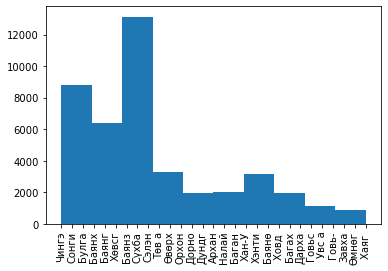

In [54]:
plt.hist(df['check'])
plt.xticks(rotation=90)
plt.show()

In [55]:
df['aimag/duureg'] = df['location'].str.split('дүүрэг').str.get(0).str.split('аймаг').str.get(0).str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).str.strip()

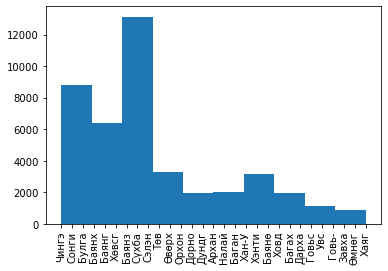

In [56]:
plt.hist(df['aimag/duureg'].str[0:5])
plt.xticks(rotation=90)
plt.show()

In [57]:
df['aimag/duureg'].unique()

array(['Чингэлтэй', 'Сонгинохайрхан', 'Булган', 'Баянхонгор', 'Баянгол',
       'Хөвсгөл', 'Баянзүрх', 'Сүхбаатар', 'Сэлэнгэ', 'Төв', 'Өвөрхангай',
       'Орхон', 'Дорноговь', 'Дундговь', 'Архангай', 'Налайх', 'Багануур',
       'Хан-Уул', 'Хэнтий', 'Баянөлгий', 'Ховд', 'Багахангай',
       'Дархан-уул', 'Говьсүмбэр', 'Увс', 'Говь-алтай', 'Дорнод',
       'Завхан', 'Өмнөговь', 'Хаяг'], dtype=object)

In [58]:
df['location'].unique()

array(['Чингэлтэй дүүрэг, 4-р хороо,',
       'Сонгинохайрхан дүүрэг, 12-р хороо,',
       'Булган аймаг Дашинчилэн сум Доргонт баг, 2-р хороо,', ...,
       'Чингэлтэй дүүрэг, 7-р хороо, Хувьсгалчдын,',
       'Баянгол дүүрэг, 19-р хороо, парадоксын автобусны буудлын орчим,',
       'Баянгол дүүрэг, 22-р хороо, такара зочид буудалд,'], dtype=object)

In [57]:
soum = df['location'].str.split('дүүрэг').str.get(0).str.split('аймаг').str.get(1).str.split('сум').str.get(0).str.strip().dropna()

In [58]:
khoroo = df['location'].str.split('дүүрэг').str.get(1).str.replace(',','').str.split('-р хороо').str.get(0).str.strip().dropna()

In [65]:
df['location'].str.split('дүүрэг').str.get(1).str.replace(',','').str.split('-р хороо').str.get(0).str.strip().dropna()

0         4
1        12
4        29
5         2
7         4
         ..
42687     1
42688    20
42689    13
42690    22
42691    20
Name: location, Length: 24834, dtype: object

In [64]:
df['location'].str.split('дүүрэг').str.get(1)

0                               , 4-р хороо,
1                              , 12-р хороо,
2                                        NaN
3                                        NaN
4                              , 29-р хороо,
                        ...                 
42687                           , 1-р хороо,
42688                          , 20-р хороо,
42689           , 13-р хороо, ногоон талбай,
42690    , 22-р хороо, такара зочид буудалд,
42691                          , 20-р хороо,
Name: location, Length: 42692, dtype: object

In [62]:
df.shape[0]

42692

In [60]:
soum.shape[0] + khoroo.shape[0]

40158

In [64]:
df['soum/khoroo'] = pd.concat([soum, khoroo]).sort_index()

In [66]:
df['aimag/duureg'] == 'Багануур'

0        False
1        False
2        False
3        False
4        False
         ...  
42687    False
42688    False
42689    False
42690    False
42691    False
Name: aimag/duureg, Length: 42692, dtype: bool

In [65]:
df.isnull().sum()

type               0
date               0
location           0
station            0
check              0
aimag/duureg       0
soum/khoroo     2534
dtype: int64

In [68]:
weird_ones = df[df['soum/khoroo'].isnull()]['location'].str.split('дүүрэг').str.get(0).str.split('-р хороо').str.get(0).str.split(',').str.get(1).str.strip()

In [69]:
df['soum/khoroo'] = pd.concat([soum,khoroo,weird_ones]).sort_index()

In [70]:
df.isnull().sum()

type            0
date            0
location        0
station         0
check           0
aimag/duureg    0
soum/khoroo     0
dtype: int64

In [71]:
df = df.drop(columns=['check'])

In [72]:
df

,type,date,location,station,aimag/duureg,soum/khoroo
0,Хулгайлах - Иргэдийн өмч,2015-01-01,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс,Чингэлтэй,4
1,Хулгайлах - Иргэдийн өмч,2015-01-01,"Сонгинохайрхан дүүрэг, 12-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс,Сонгинохайрхан,12
2,Хулгайлах - Мал,2015-01-01,"Булган аймаг Дашинчилэн сум Доргонт баг, 2-р х...",Булган аймаг дахь ЦГ,Булган,Дашинчилэн
3,Бусдын бие махбодид гэмтэл учруулах,2015-01-01,Баянхонгор аймаг Баянхонгор сум 1 дүгээр баг Н...,Баянхонгор аймаг дахь ЦГ,Баянхонгор,Баянхонгор
4,Дээрэмдэх,2015-01-01,"Сонгинохайрхан дүүрэг, 29-р хороо,",Сонгинохайрхан дүүрэг дэх цагдаагийн 3-р хэлтэс,Сонгинохайрхан,29
...,...,...,...,...,...,...
42687,Хулгайлах - Халаас,2016-12-30,"Баянзүрх дүүрэг, 1-р хороо,",Баянзүрх дүүрэг дэх цагдаагийн 2-р хэлтэс,Баянзүрх,1
42688,Хулгайлах - Иргэдийн өмч,2016-12-30,"Баянгол дүүрэг, 20-р хороо,",Баянгол дүүрэг дэх цагдаагийн 2-р хэлтэс,Баянгол,20
42689,Хулгайлах - Иргэдийн өмч,2016-12-30,"Сүхбаатар дүүрэг, 13-р хороо, ногоон талбай,",Сүхбаатар дүүрэг дэх цагдаагийн 2-р хэлтэс,Сүхбаатар,13
42690,Хүчиндэх,2016-12-30,"Баянгол дүүрэг, 22-р хороо, такара зочид буудалд,",Баянгол дүүрэг дэх цагдаагийн 1-р хэлтэс,Баянгол,22


In [73]:
import plotly.express as px

In [74]:
df.head(1)

,type,date,location,station,aimag/duureg,soum/khoroo
0,Хулгайлах - Иргэдийн өмч,2015-01-01,"Чингэлтэй дүүрэг, 4-р хороо,",Чингэлтэй дүүрэг дэх цагдаагийн 2-р хэлтэс,Чингэлтэй,4


In [ ]:
px.choropleth_mapbox(df, geojson=counties, locations='fips', color='unemp')

In [76]:
df.to_csv('crime_cleaned.csv', index=False)